<a href="https://colab.research.google.com/github/imon333/TensorFLow/blob/main/02_neural_network_classification_With_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural network classification with TensorFlow

Here I will focus on write neural networks for classification problems

A classification is where we can try to classify somethings as one things or another.

Types of classification problems:

- Binary classification
- Muliclass classification
- Multilabel classification

- **Binary**: Two choices. Email spam or not? Yes or no.

- **Multiclass**: Multiple choices, pick one. Cat, dog, or bird?
- **Multilabel**: Multiple choices, pick any that apply. Movie tagged as both Action AND Comedy.

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples= 1000

# Create circles
x,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)



In [2]:
# Check out feature
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out feature
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

## Data visualize

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0" :x[:,0], "X1":x[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


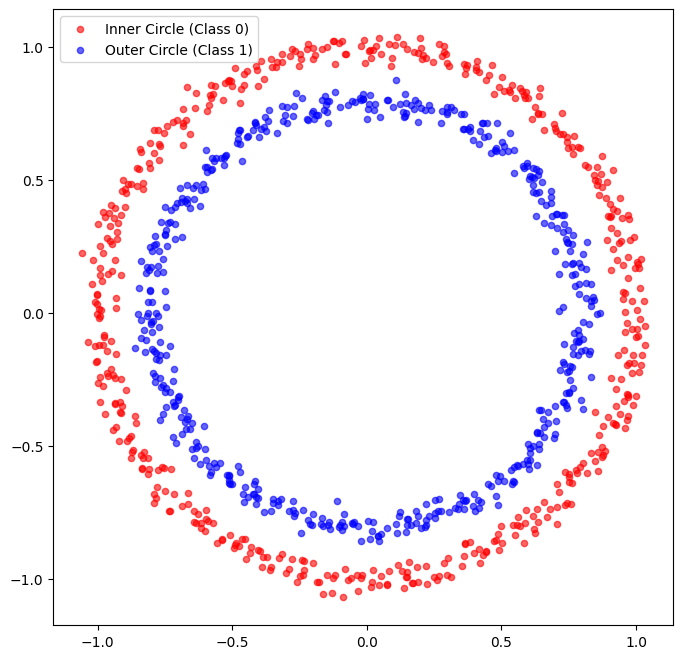

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(x[y == 0, 0], x[y == 0, 1], c='red', label='Inner Circle (Class 0)', s=20, alpha=0.6)
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='blue', label='Outer Circle (Class 1)', s=20, alpha=0.6)
plt.legend()
plt.show()

## Input and output shapes


In [6]:
# Check the shapes of our feature and labels
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(x), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
x[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

## Steps in modelling

The steps in modelling with Tensorflow are typically:
- Create or import a model
- Compile the model
- Fit the model
- Evaluate the model
- Tweak
- Evaluate

In [10]:

#remember the architecture of classification model---------


import tensorflow as tf


# Set the random seed

tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses)